<p style="font-family:verdana;color:#29285D;font-size:200%;text-align:center"><b>🛒
    Air Quality forecasting(CO2 emissions)  🛒<br>
    </p> 
<p style="font-family:verdana;text-align:center">***************</p>



<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 1 : Understand The Business Problem </h2> 

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Business Statement 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
          To forecast Co2 levels for an organization so that the organization can follow government norms
with respect to Co2 emission levels.
        </p>
    </div>

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 2 : Load The Data </h2> 

In [1]:
#Importing libraries
import warnings
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss 

import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt

from matplotlib import pyplot# Import libraries

from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings("ignore")
from datetime import datetime


In [2]:
#Import the data
data = pd.read_excel('CO2 dataset.xlsx')
data.head()                   # will show 1st 5 rows only

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 3: EDA and Visualization </h2> 

In [3]:
data=data.loc[:214]
data.shape  # will show rows and columns

(215, 2)

In [4]:

data.isnull().sum()          # This functin will show the total null values in our data

Year    0
CO2     0
dtype: int64

In [5]:
data.info()             # this function will show the all information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [6]:
data.describe()          # This function will describe the data

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [7]:
data.skew()  # positively skewed

Year    0.000000
CO2     0.362736
dtype: float64

In [8]:
len(data[data['CO2']<1]) # 37% CO2 values are less then 1 

80

In [9]:
data[data['CO2'] == data['CO2'].max()]


,Year,CO2
179,1979,18.2


In [10]:
data[data.duplicated()]              # No duplicated data present in ur dataset

,Year,CO2


In [11]:
data['Year'] = data['Year'].astype(int)   #convert the year column from float to int
data['CO2'] = data['CO2'].astype(float)
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int32  
 1   CO2     215 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 2.6 KB


<h2 style="color:#DC7633;">Visualization </h2>


In [12]:

data.index = pd.to_datetime(data['Year'], format='%Y')
print(data)
data.drop('Year',axis=1, inplace=True)
data.head()


            Year       CO2
Year                      
1800-01-01  1800   0.00568
1801-01-01  1801   0.00561
1802-01-01  1802   0.00555
1803-01-01  1803   0.00548
1804-01-01  1804   0.00542
...          ...       ...
2010-01-01  2010  15.60000
2011-01-01  2011  15.60000
2012-01-01  2012  14.80000
2013-01-01  2013  14.70000
2014-01-01  2014  15.10000

[215 rows x 2 columns]


,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 1800-01-01 to 2014-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     215 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


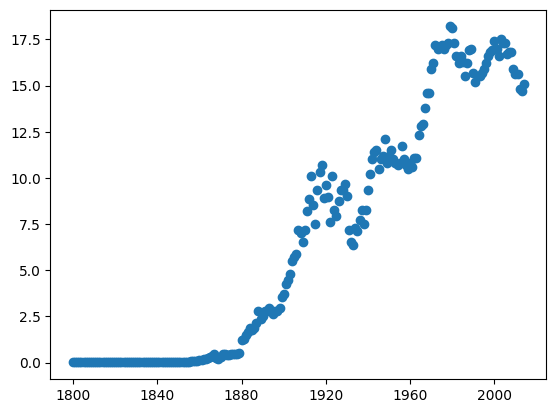

In [14]:
#scatter plot
plt.scatter(x=data.index,y=data['CO2'])
plt.show()

5 <h2 style="color:#DC7633;">Histogram</h2>


array([[<AxesSubplot: title={'center': 'CO2'}>]], dtype=object)

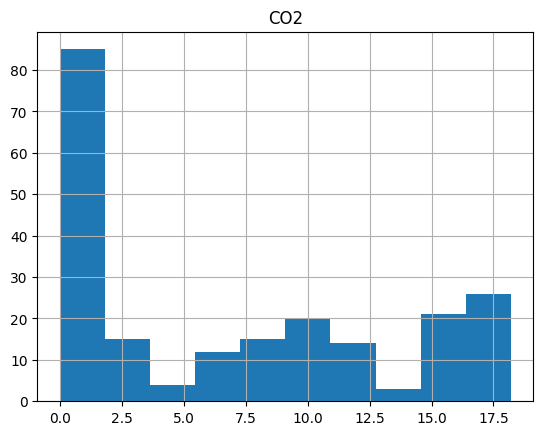

In [15]:
 data.hist()



<AxesSubplot: ylabel='Count'>

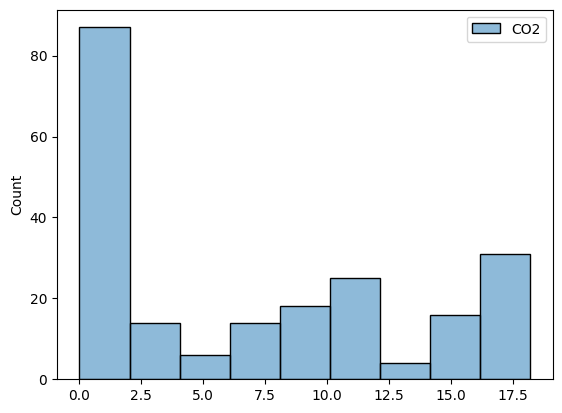

In [16]:
 import seaborn as sns
sns.histplot(data) 


<h2 style="color:#DC7633;">Line plot</h2>


<AxesSubplot: xlabel='Year'>

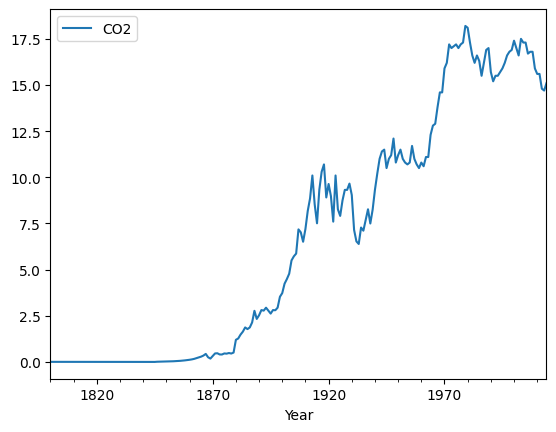

In [17]:
data.plot()              # we can see there is a upword trend in plot

<h2 style="color:#DC7633;">Box Plot</h2>


<AxesSubplot: xlabel='CO2'>

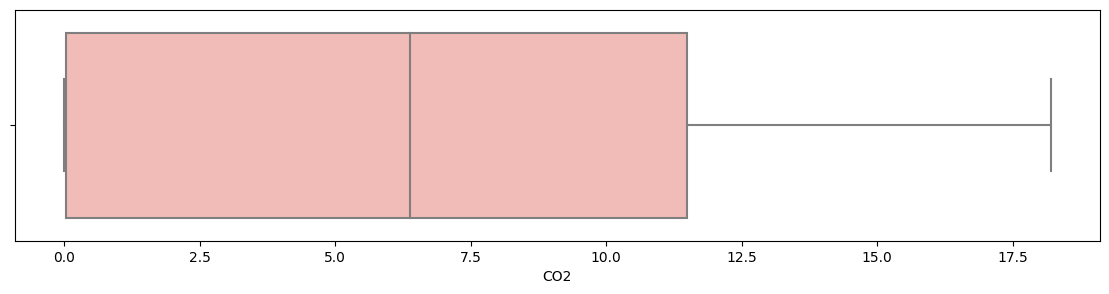

In [18]:
# Boxplot for ever
import seaborn as sns
plt.figure(figsize=(14,3))
sns.boxplot(x = data['CO2'], palette='Pastel1')

<h2 style="color:#DC7633;">Lag Plot</h2>


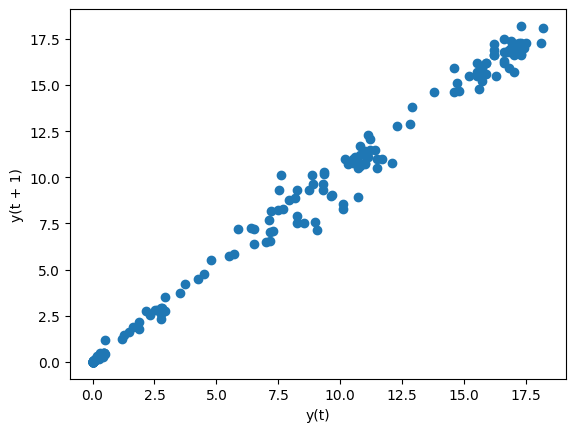

In [19]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(data)
pyplot.show()                  # data is linear

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) After the total observation we can see the trend of our data and we have higher rate between -5 to +5<br><br>
          2) There is trend in your data because after some period its going high suddenly and its moving up direction<br><br>
           3) The Data is linear we can see using log plot
        </p>
    </div>



<h2 style="color:#DC7633;">seasonal_decomposet</h2>


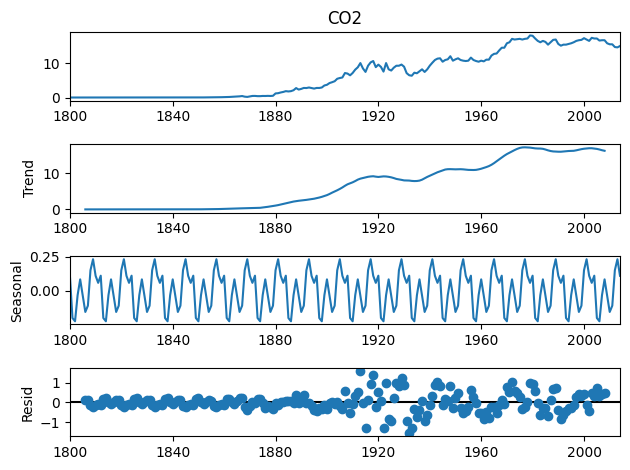

In [20]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.CO2,period=12)
decompose_ts_add.plot()
plt.show()

<AxesSubplot: xlabel='Year'>

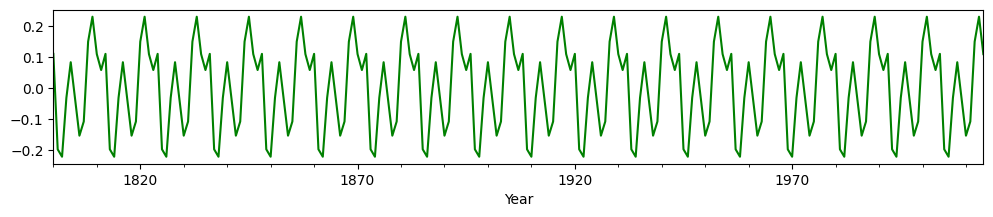

In [21]:
seasonality=decompose_ts_add.seasonal
seasonality.plot(color='green', figsize = (12,2))


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) In the seasonality graph, we can see the seasonality structure for every year, which is cyclic and repeatedly providing the same value. <br><br>
  2) To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an              autocorrelation plot.<br>
        </p>
    </div>

<h2 style="color:#DC7633;">ACF Plot</h2>


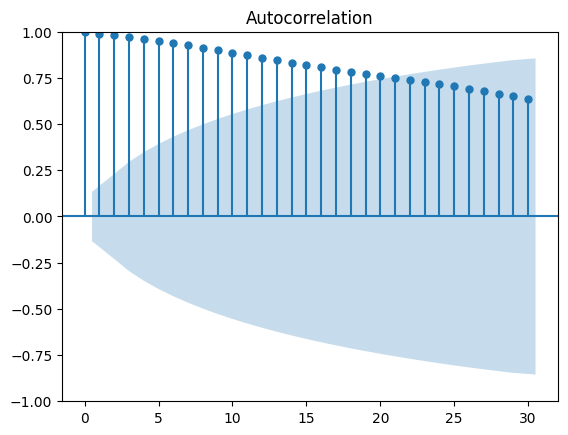

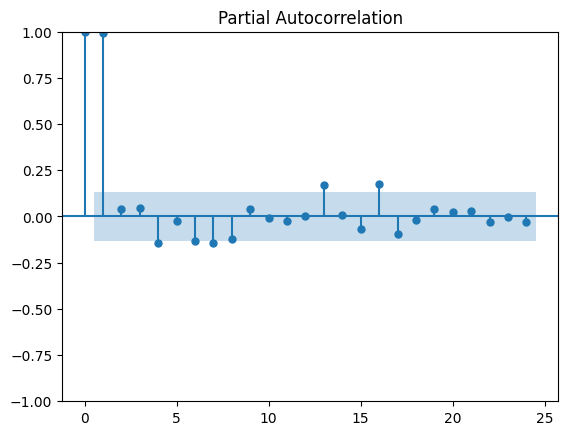

In [22]:
#To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an autocorrelation plot.
# It will check the correlation between previous data 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(data,lags=30)
plot_pacf(data)
pyplot.show()


-acf plot is use to identify how much lag value should be considered to do the good prediction, value which is near -1 and 1 on y axis are considered highly corelated at perticualar lag point on x axis
-for 0 lag value it always gives 1 as corelation so that we need to skip that
-shadded region in acf plot represents errors +2 std erros and -2 standard errors, lag value should be greater than this.

-so here we consider 1 lag value which gives high correlation


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        1)  Here the blue area is the confidence interval<br><br>
         2) Each candle is present on previous or historical data it means if we know the historical/Past year CO2 then we             can forecast next year CO2 <br><br>
           3) There are strongly psitive correlation 
    </p>
    </div>


 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 4 : Pre-Process Data </h2> 

<h3 style="color:orange;">Stationary data means? </h3>

1) constant mean

2) constant variance

3) constant covariance (uncorrelated)

We verify this by observing change in mean, variance, autocorrelation and with a statistical test (ADFuller test)


 <h3 style="color:green;">Following are the Techniques to check data is stationary or not ?</h3>

1) Augmented Dickey-fuller test

2) Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

3) Rolling Statistics


**bold text**<h3 style="color:blue;">1) Augmented Dickey-fuller test or not? </h3>


In [23]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")


print("\n > Is the de-trended data stationary ?")
dftest = adfuller(data['CO2'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values for :")
for k, v in dftest[4].items():
    print("\t{}: is {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

Observations of Dickey-fuller test

 > Is the de-trended data stationary ?
Test statistic = -0.378
P-value = 0.914
Critical values for :
	1%: is -3.4612821203214907 - The data is not stationary with 99% confidence
	5%: is -2.875142613826617 - The data is not stationary with 95% confidence
	10%: is -2.574020122281422 - The data is not stationary with 90% confidence


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        Augmented Dicky Fuller test is a statistical test for stionarity.<br> 
        If the p value is less than 0.05, the series is stationary, otherwise non-stationary. 
    </p>
    </div>

<h3 style="color:blue;">2) Kwiatkowski-Phillips-Schmidt-Shin (KPSS) or not? </h3>


In [24]:
from statsmodels.tsa.stattools import adfuller, kpss 


In [25]:
result_kpss_ct_log=kpss(data['CO2'],regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.310000
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


 <h3 style="color:blue;">3) Rolling Statistics Test</h3>


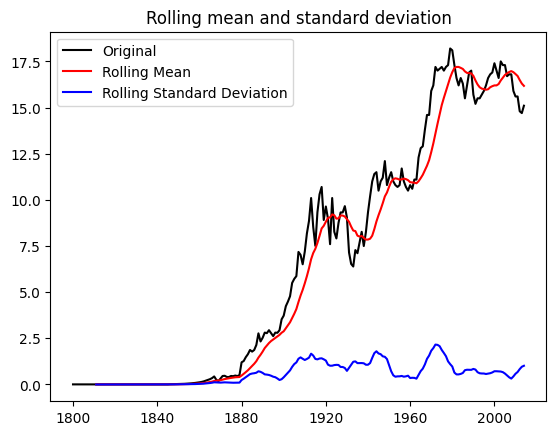

In [26]:
rmean=data.rolling(window=12).mean()
rstd=data.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(data , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        In this graph we can see mean and variance is not constant so we can say our data is non stationary 
    </p>
    </div>

  <h2 style="color:Orange;">    Making Time Series Stationary Test</h2>
<h3 style="color:Green;">    Differencing Test</h3>
<h4 style="color:blue;">  First  Differencing Test</h4>


Differencing is a common technique in time series analysis used to stabilize the mean and eliminate trends or seasonality.

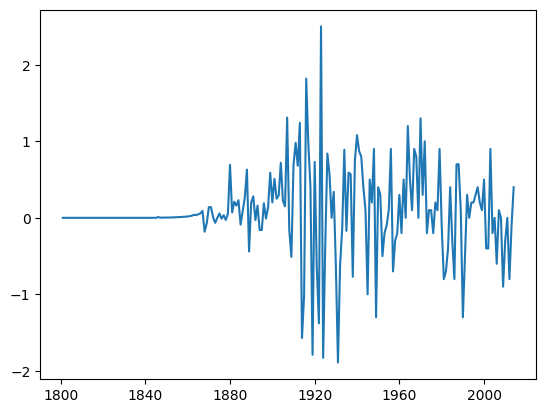

In [27]:
import numpy as np

 # making the data stationary
#data['First Difference'] = data['CO2'] - data['CO2'].shift(1)
#plt.plot(data['First Difference'])
#data1=data.copy()
data['First Difference'] = data['CO2'] - data['CO2'].shift(1)
plt.plot(data['First Difference'])


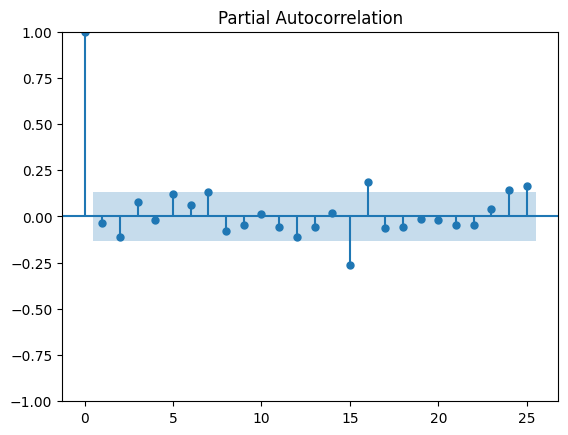

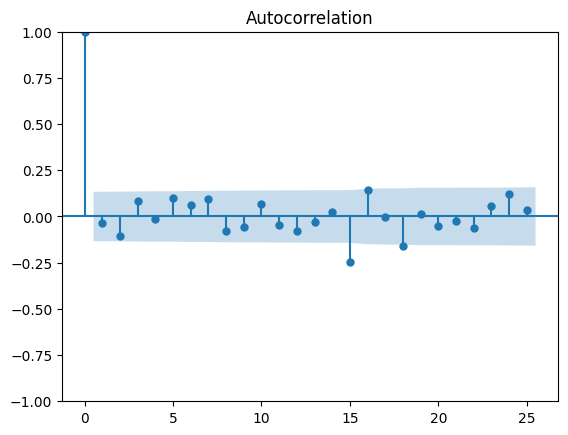

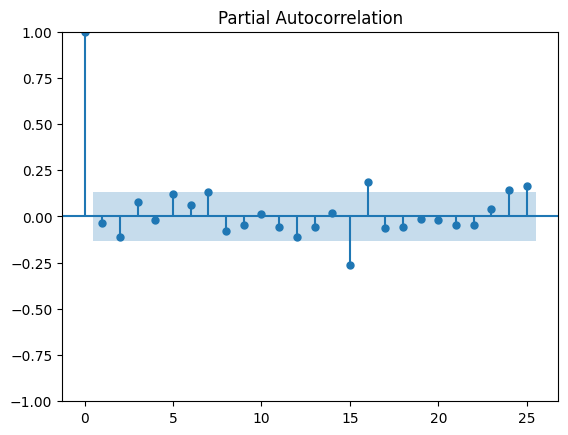

In [28]:
plot_acf(data['First Difference'].dropna(),lags=25)
plot_pacf(data['First Difference'].dropna(),lags=25)

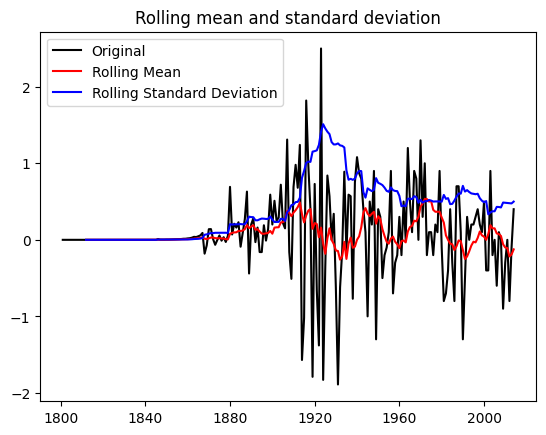

In [29]:
rmean=data['First Difference'].rolling(window=12).mean()
rstd=data['First Difference'].rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(data['First Difference'] , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

In [30]:
from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(data['First Difference'].dropna(),autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

 > Is the data stationary ?
Test statistic = -3.780
P-value = 0.003
Critical values :
	1%: -3.4638151713286316 - The data is  stationary with 99% confidence
	5%: -2.876250632135043 - The data is  stationary with 95% confidence
	10%: -2.574611347821651 - The data is  stationary with 90% confidence


In [31]:
result_kpss_ct_log=kpss(data['First Difference'].dropna(),regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.100000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) p value is less than 0.05, the series is stationary. <br>
        2) In this graph we can see mean and variance is not constant so we can say our data is non stationary<br> 
         3) If the p-value is greater than a predefined alpha level (typically 0.05), we accept the null hypothesis.      
    </p>
    </div>

In [32]:
 data

,CO2,First Difference
Year,,
1800-01-01,0.00568,NaN
1801-01-01,0.00561,-0.00007
1802-01-01,0.00555,-0.00006
1803-01-01,0.00548,-0.00007
1804-01-01,0.00542,-0.00006
...,...,...
2010-01-01,15.60000,-0.30000
2011-01-01,15.60000,0.00000
2012-01-01,14.80000,-0.80000


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [34]:
Train = data.head(180)
Test =data.tail(35)

In [35]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

  <h2 style="color:Orange;">  Simple Exponential Method</h2>


Train MAE: 0.6108156763277781
Test MAE: 0.7594402120707794 

Train RMSE : 0.9963994338145253 
Test RMSE : 0.9711142323936686 

Train MAPE : 19.981677942241973 
Test MAPE : 4.810371631853253


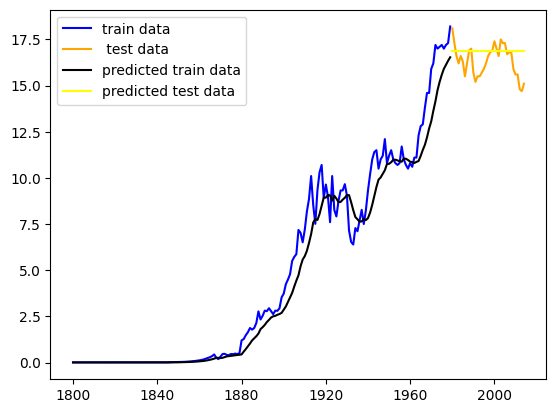

In [36]:

ses_model = SimpleExpSmoothing(Train['CO2']).fit(smoothing_level=0.2)
#ses_model = SimpleExpSmoothing(Train.CO2).fit(smoothing_level=0.3, optimized=False)
pred_ses_train = ses_model.predict(start = Train.index[0],end = Train.index[-1])

pred_ses_test = ses_model.predict(start = Test.index[0], end = Test.index[-1])

plt.plot(Train.CO2,color='blue',label='train data' )
plt.plot(Test.CO2, color='orange',label=' test data')

plt.plot(pred_ses_train,  color='black',label='predicted train data')
plt.plot(pred_ses_test, color='yellow',label='predicted test data')
plt.legend(loc = "best")

rmse = sqrt(mean_squared_error(Train.CO2, pred_ses_train))
print('Train MAE:', mean_absolute_error(Train.CO2,pred_ses_train)) 
rmse1 = sqrt(mean_squared_error(Test.CO2, pred_ses_test))
print('Test MAE:', mean_absolute_error(Test.CO2,pred_ses_test),'\n') 

print('Train RMSE :',rmse ,'\n' 'Test RMSE :',rmse1,'\n')
print('Train MAPE :',MAPE(pred_ses_train,Train.CO2) ,'\n''Test MAPE :',MAPE(pred_ses_test,Test.CO2))




  <h2 style="color:Orange;"> Holt method</h2>


Train MAE: 1.4160749997908684
Test MAE: 1.4697648822642475 

Train RMSE : 1.862133992370205 
Test RMSE : 1.9823781434220071 



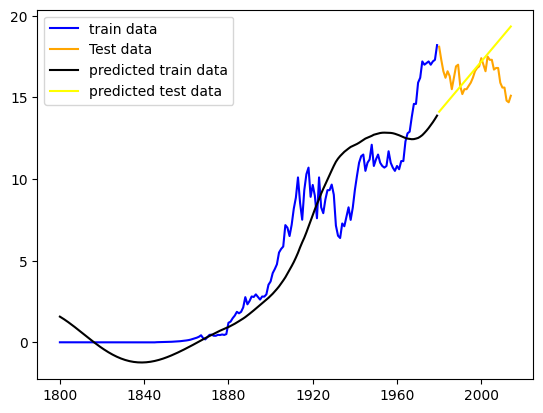

In [37]:
# Holt method 
hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.02, smoothing_slope=0.2)

pred_hw_train = hw_model.predict(start = Train.index[0],end = Train.index[-1])

pred_hw_test = hw_model.predict(start = Test.index[0],end = Test.index[-1])

plt.plot(Train.CO2,color='blue',label='train data')
plt.plot(Test.CO2,color='orange',label='Test data')

plt.plot(pred_hw_train, color='black',label='predicted train data')
plt.plot(pred_hw_test,color='yellow',label='predicted test data')

plt.legend(loc = "best")


rmse_train = sqrt(mean_squared_error(Train.CO2, pred_hw_train))
rmse_test = sqrt(mean_squared_error(Test.CO2, pred_hw_test))

print('Train MAE:', mean_absolute_error(Train.CO2,pred_hw_train)) 
print('Test MAE:', mean_absolute_error(Test.CO2,pred_hw_test),'\n') 

print('Train RMSE :',rmse_train ,'\n' 'Test RMSE :',rmse_test,'\n')
#print('Train MAPE :',MAPE(pred_hw_train,Train.CO2) ,'\n''Test MAPE :',MAPE(pred_hw_test,Test.CO2))

  <h2 style="color:Orange;"> Holts winter exponential smoothing with additive seasonality and additive trend
</h2>



Train RMSE : 0.5432615232069459 
Test RMSE : 5.109619533565262 

Train MAPE : 563.954568070344 
Test MAPE : 29.337180963430125 

Train MAE: 0.33025697185002617
Test MAE: 4.717558311256483


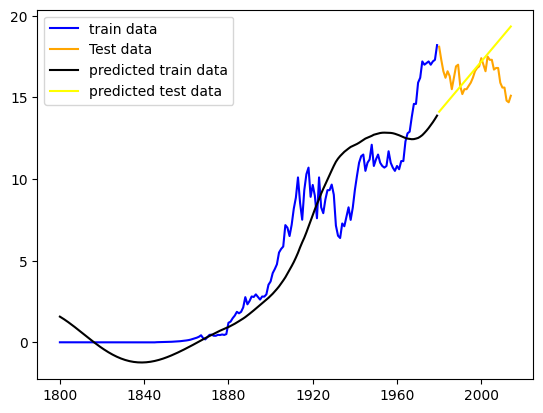

In [38]:
# Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()

pred_hwe_add_add_train = hwe_model_add_add.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_add_add_test = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

#MAPE(pred_hwe_add_add,Test.CO2)
plt.plot(Train.CO2,color='blue',label='train data')
plt.plot(Test.CO2,color='orange',label='Test data')

plt.plot(pred_hw_train, color='black',label='predicted train data')
plt.plot(pred_hw_test,color='yellow',label='predicted test data')

plt.legend(loc = "best")


rmseTrain = sqrt(mean_squared_error(Train.CO2, pred_hwe_add_add_train))
rmseTest = sqrt(mean_squared_error(Test.CO2, pred_hwe_add_add_test))

print('Train RMSE :',rmseTrain ,'\n''Test RMSE :',rmseTest,'\n')
print( 'Train MAPE :',MAPE(pred_hwe_add_add_train,Train.CO2),'\n''Test MAPE :',MAPE(pred_hwe_add_add_test,Test.CO2),'\n')
print('Train MAE:', mean_absolute_error(Train.CO2,pred_hwe_add_add_train)) 
print('Test MAE:', mean_absolute_error(Test.CO2,pred_hwe_add_add_test)) 

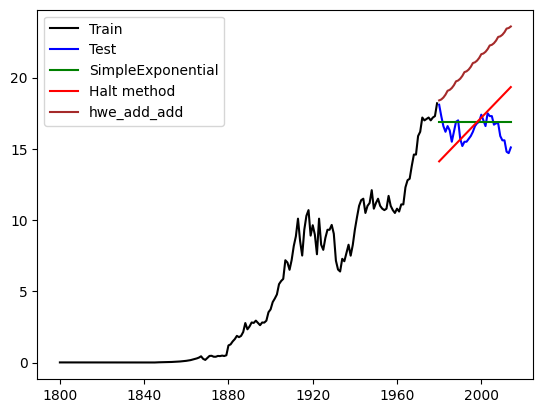

In [39]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["CO2"], label='Train',color="black")
plt.plot(Test.index, Test["CO2"], label='Test',color="blue")
plt.plot(pred_ses_test.index, pred_ses_test, label='SimpleExponential',color="green")
plt.plot(pred_hw_test.index, pred_hw_test, label='Halt method',color="red")
plt.plot(pred_hwe_add_add_test.index,pred_hwe_add_add_test,label="hwe_add_add",color="brown")
plt.legend(loc='best')

In [40]:
##### separate out a validation dataset
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 205, Validation 10


In [41]:
dataset

,CO2,First Difference
Year,,
1800-01-01,0.00568,NaN
1801-01-01,0.00561,-0.00007
1802-01-01,0.00555,-0.00006
1803-01-01,0.00548,-0.00007
1804-01-01,0.00542,-0.00006
...,...,...
2000-01-01,17.40000,0.50000
2001-01-01,17.00000,-0.40000
2002-01-01,16.60000,-0.40000


In [42]:
validation

,CO2,First Difference
Year,,
2005-01-01,17.3,0.0
2006-01-01,16.7,-0.6
2007-01-01,16.8,0.1
2008-01-01,16.8,0.0
2009-01-01,15.9,-0.9
2010-01-01,15.6,-0.3
2011-01-01,15.6,0.0
2012-01-01,14.8,-0.8
2013-01-01,14.7,-0.1


In [43]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
#train1 = pd.read_excel('CO2 dataset.xlsx', header=None, index_col=0, parse_dates=True, squeeze=True)
X = data['CO2'].values
train, test = X[1:180], X[180:]


In [44]:
len(train)

179

In [45]:
# walk-forward validation (naive forecast model i.e. 1 step lag )
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('\nRMSE :',rmse)
print('MAE:', mean_absolute_error(test,predictions)) 


>Predicted=18.200, Expected=18.100
>Predicted=18.100, Expected=17.300
>Predicted=17.300, Expected=16.600
>Predicted=16.600, Expected=16.200
>Predicted=16.200, Expected=16.600
>Predicted=16.600, Expected=16.300
>Predicted=16.300, Expected=15.500
>Predicted=15.500, Expected=16.200
>Predicted=16.200, Expected=16.900
>Predicted=16.900, Expected=17.000
>Predicted=17.000, Expected=15.700
>Predicted=15.700, Expected=15.200
>Predicted=15.200, Expected=15.500
>Predicted=15.500, Expected=15.500
>Predicted=15.500, Expected=15.700
>Predicted=15.700, Expected=15.900
>Predicted=15.900, Expected=16.200
>Predicted=16.200, Expected=16.600
>Predicted=16.600, Expected=16.800
>Predicted=16.800, Expected=16.900
>Predicted=16.900, Expected=17.400
>Predicted=17.400, Expected=17.000
>Predicted=17.000, Expected=16.600
>Predicted=16.600, Expected=17.500
>Predicted=17.500, Expected=17.300
>Predicted=17.300, Expected=17.300
>Predicted=17.300, Expected=16.700
>Predicted=16.700, Expected=16.800
>Predicted=16.800, E


  <h2 style="color:Orange;">   ARIMA Hyperparameters</h2>


In [46]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
print(rmse)

0.5096217084409629



<h2 style="color:Orange;">  Grid search for p,d,q values</h2>


In [47]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                    
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
# instead of typing all this code from this cell we can use grid search cross validation technique which is used in neural
#networking

In [48]:
import warnings
# evaluate parameters
p_values = range(0, 3)
d_values = range(1, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)


Best ARIMANone RMSE=inf


<h2 style="color:Orange;">  Build Model based on the optimized values</h2>


In [49]:
##### save finalized model to file
from pandas import read_csv

from statsmodels.tsa.arima.model import ARIMA

import numpy

In [50]:
train_data = data.loc[:'2000-01-01','CO2']
test_data = data.loc['2000-01-01':]

In [51]:
train_data

Year
1800-01-01     0.00568
1801-01-01     0.00561
1802-01-01     0.00555
1803-01-01     0.00548
1804-01-01     0.00542
                ...   
1996-01-01    16.20000
1997-01-01    16.60000
1998-01-01    16.80000
1999-01-01    16.90000
2000-01-01    17.40000
Name: CO2, Length: 201, dtype: float64

In [52]:

# fit model
model = ARIMA(train_data, order=(1,0,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
#model_fit.plot_predict('1800-01-01', '2000-01-01', dynamic=True, ax=ax, plot_insample=False)



In [53]:

from statsmodels.tsa.ar_model import AutoReg


# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=15).fit()

# Print Summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  201
Model:                    AutoReg(15)   Log Likelihood                -151.135
Method:               Conditional MLE   S.D. of innovations              0.545
Date:                Tue, 16 Jan 2024   AIC                            336.270
Time:                        22:49:57   BIC                            391.107
Sample:                    01-01-1815   HQIC                           358.492
                         - 01-01-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0844      0.059      1.440      0.150      -0.030       0.199
CO2.L1         0.9461      0.073     12.885      0.000       0.802       1.090
CO2.L2        -0.0682      0.101     -0.675      0.4

RMSE: 2.899389539127425
MAE: 2.4944883862330185


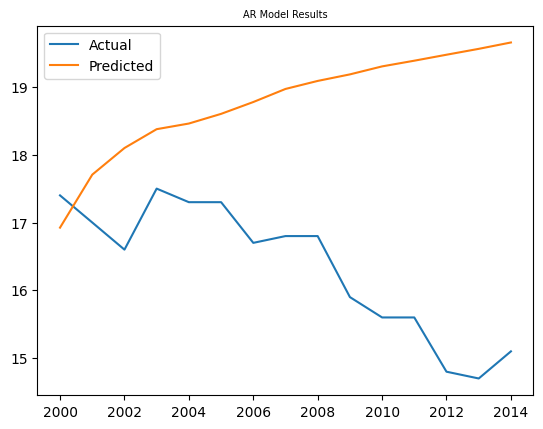

In [54]:
ar_forecast = ar_model.predict('2000-01-01', '2014-01-01')

plt.title('AR Model Results', size=7)
plt.plot(data.loc['2000-01-01':,'CO2'],label='Actual')
plt.plot(ar_forecast,label='Predicted')
plt.legend();

print('RMSE:', np.sqrt(mean_squared_error(data.loc['2000-01-01':,'CO2'],ar_forecast)))
print('MAE:', mean_absolute_error(data.loc['2000-01-01':,'CO2'],ar_forecast))

In [55]:
train_datafd = data.loc['1801-01-01':'2000-01-01','First Difference']

# Instantiate and fit the AR model with training data
ar_modelfd = AutoReg(train_datafd, lags=15).fit()

# Print Summary
#print(ar_modelfd.summary())

RMSE: 0.5778821815728581
MAE: 0.48879650665951535


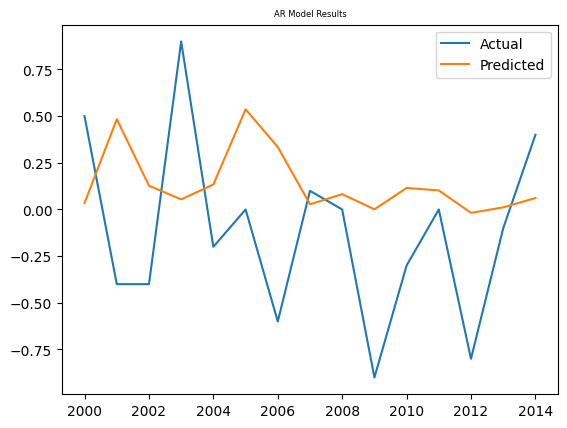

In [56]:


ar_forecastfd = ar_modelfd.predict('2000-01-01', '2014-01-01')
plt.title('AR Model Results', size=6)
plt.plot(data.loc['2000-01-01':,'First Difference'],label='Actual')
plt.plot(ar_forecastfd,label='Predicted')
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(data.loc['2000-01-01':,'First Difference'],ar_forecastfd)))
print('MAE:',mean_absolute_error(data.loc['2000-01-01':,'First Difference'],ar_forecastfd))

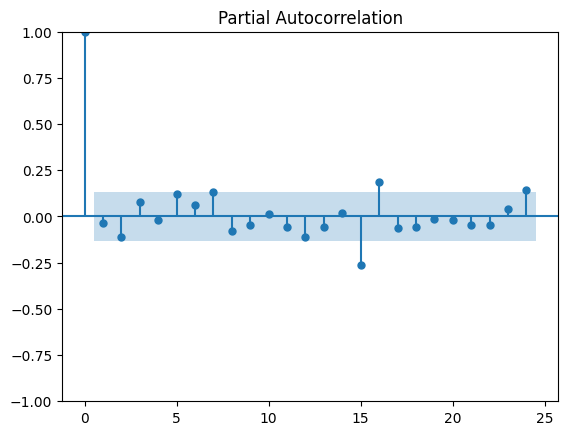

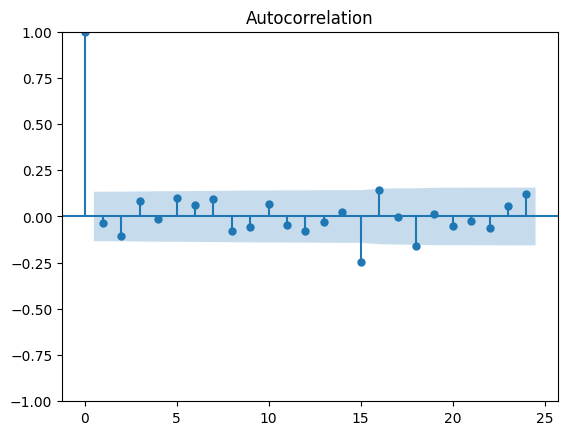

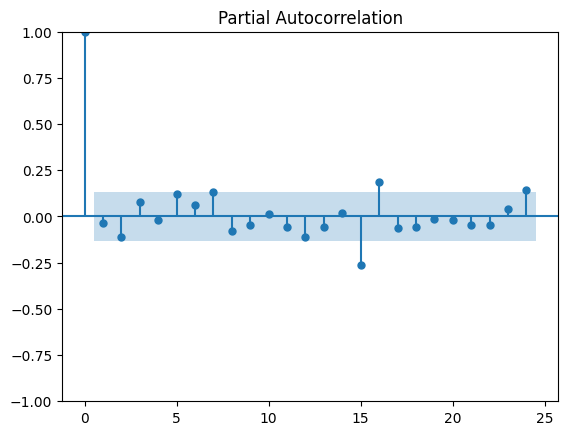

In [57]:
plot_acf(data.CO2.diff().dropna())

plot_pacf(data.CO2.diff().dropna())

RMSE: 0.49377522038208516
MAE 0.42215189513067664


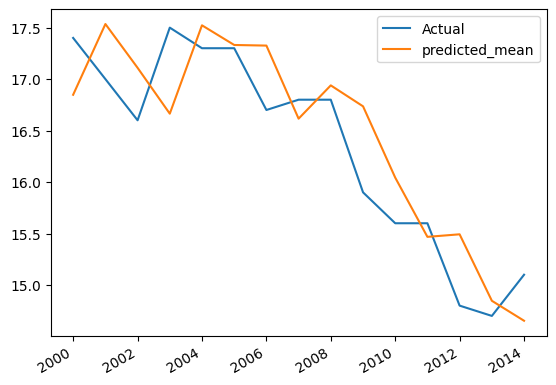

In [58]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

arima2 = ARIMA(data.loc[:,'CO2'], order=(7, 1, 2))
results2 = arima2.fit()
predictions2 = results2.predict('2000-01-01', '2014-01-01')

plt.plot(data.loc['2000-01-01':,'CO2'],label='Actual')
predictions2.plot()
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(data.loc['2000-01-01':,'CO2'],predictions2)))
print('MAE',mean_absolute_error(data.loc['2000-01-01':,'CO2'],predictions2))
#print('MAPE',mean_absolute_percentage_error(data.loc['2000-01-01':,'First Difference'],predictions2)*100) 

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -167.416
Date:                Tue, 16 Jan 2024   AIC                            354.832
Time:                        22:50:08   BIC                            388.492
Sample:                    01-01-1800   HQIC                           368.434
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5400      0.113     -4.786      0.000      -0.761      -0.319
ar.L2         -0.8673      0.098     -8.857      0.000      -1.059      -0.675
ar.L3          0.0399      0.067      0.596      0.5

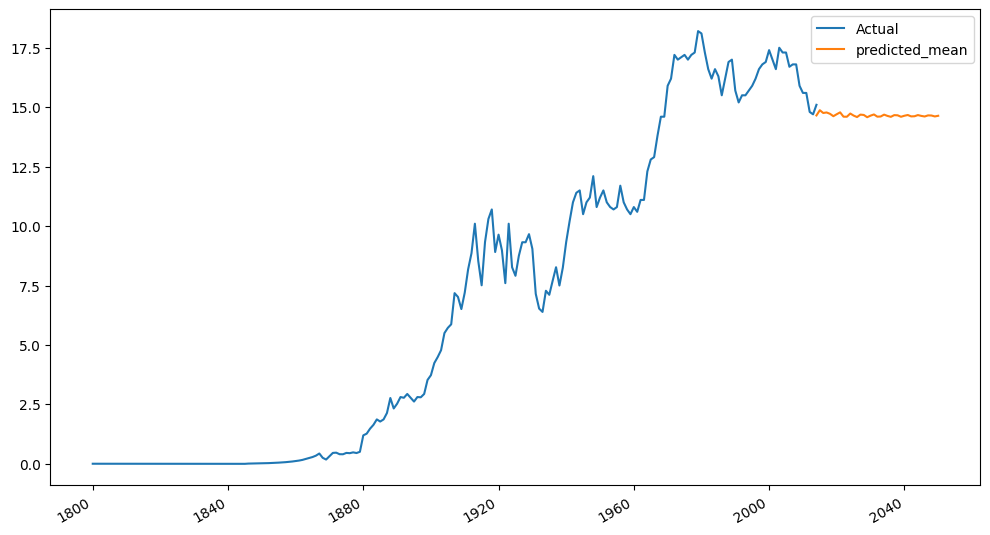

In [59]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(data.loc[:,'CO2'], order=(7,1,2))
resultf = arima.fit()
predictionf = resultf.predict('2014-01-01', '2050-01-01')
plt.figure(figsize=(12,7))
plt.plot(data.loc[:,'CO2'],label='Actual')
predictionf.plot()
plt.legend();
print(resultf.summary())

In [60]:
#Install streamlit 
# NB : If any error occurs during installation process , run it again
!pip install -q streamlit
!npm install -g localtunnel -U

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
'npm' is not recognized as an internal or external command,
operable program or batch file.


In [61]:
%%writefile main.py 


import streamlit as st
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA
import numpy as np 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import pyplot



data = pd.read_csv("CO2 dataset.csv")
data2 = pd.read_csv("CO2 dataset.csv",header=0, index_col=0,parse_dates=True )


final_arima = ARIMA(data2['CO2'],order = (7,1,2))
final_arima = final_arima.fit()



st.title("Forecasting CO2 Emission")
nav = st.sidebar.radio("Navigation",["About data","Prediction","Forecast"])
if nav == "About data":
    st.subheader("Data")
    data
    st.subheader("Scatter plot of the data")
    st.set_option('deprecation.showPyplotGlobalUse', False)
    plt.figure(figsize = (10,5))
    plt.scatter(data["Year"],data["CO2"])
    plt.ylim(0)
    plt.xlabel("Years")
    plt.ylabel("CO2 Emission")
    plt.tight_layout()
    st.pyplot()


    st.subheader("Line plot of the data") 
    st.line_chart(data=data.CO2, width=150, height=300, use_container_width=True)
   

    st.subheader("Histogram of the data") 
    fig= plt.figure(figsize=(10,4))
    plt.hist(data.CO2)
    st.pyplot(fig)
 

  
  
if nav == "Prediction":
   predict = final_arima.fittedvalues
   data2["Predicted_CO2"] = predict
   data2
   plt.plot(data2.CO2, label='original',color='black')
   plt.plot(predict, label='Predicted',color='red')
   plt.title('Prediction')
   plt.legend(loc='upper left', fontsize=8)
   st.pyplot()
  


if nav == "Forecast":
    
    year = st.slider("Select number of Year from 2015",1,21,step = 1)

    st.subheader("Forecasting the data for next few years")
    
    
    pred = final_arima.forecast(year)
   
    if st.button("Predict"):
       st.subheader(f"Your predicted CO2 emission from year 2015" )
       pred

       st.subheader("Line plot of the Forecasted data")
       plt.plot(data2.CO2, label='original')
       plt.plot(pred, label='Predicted')
       plt.title('Forecast')
       plt.legend(loc='upper left', fontsize=8)
       st.pyplot()
  

       st.subheader("Histogram of the Forecasted data") 
       fig1= plt.figure(figsize=(10,4))
       plt.hist(pred)
       st.pyplot(fig1)

Writing main.py


In [ ]:

!streamlit run main.py & npx localtunnel --port 8501 
